In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [152]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, vmin=-50, vmax=50, **kwargs)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True, labelsize=14,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("white", "black"),
                     threshold=None, **textkw):
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [3]:
base = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'
pkl = 'rxtr-type_mll_scikit_compare.pkl'
df1 = pd.read_pickle(base+pkl)

In [4]:
pkl = 'no-rxtr-type_mll_scikit_compare.pkl'
df2 = pd.read_pickle(base+pkl)

In [5]:
rename1 = {'knn' : 'kNN Known', 'dtree' : 'DTree Known', 'mll' : 'MLL Known'}
rename2 = {'knn' : 'kNN Unknown', 'dtree' : 'DTree Unknown', 'mll' :  'MLL Known'}
df1.rename(columns=rename1, inplace=True)
df2.rename(columns=rename2, inplace=True)

In [6]:
df = pd.concat([df1, df2], axis=1)

In [15]:
l = ['kNN Known', 'kNN Unknown', 'DTree Known', 'DTree Unknown',  'MLL Known',  'MLL Unknown']
df.loc[:, (l, 'MAE')]
#print(df.to_string())


Algorithm               kNN Known   kNN Unknown   DTree Known DTree Unknown  \
Metric                        MAE           MAE           MAE           MAE   
PredParam  RxtrType                                                           
burnup     pwr       2.992008e+01  2.915546e+01  9.940661e+00  1.287003e+01   
           bwr       3.672860e+01  3.651948e+01  8.203592e+00  8.933005e+00   
           phwr      1.117315e+01  1.634033e+01  8.156250e-01  2.372649e+00   
cooling    pwr       1.324569e+02  1.280493e+02  3.377423e+01  3.223565e+01   
           bwr       1.756764e+02  1.755930e+02  3.553767e+01  3.522708e+01   
           phwr      2.431814e+02  3.111974e+02  8.886464e+01  7.342898e+01   
enrichment pwr       1.374173e-03  1.750496e-03  4.898313e-04  5.498512e-04   
           bwr       2.422371e-03  2.381820e-03  5.202133e-04  5.396236e-04   
           phwr      8.871871e-18  8.491884e-18  7.006234e-15  1.012167e-14   

Algorithm             MLL Known MLL Unknown  
Metric                      MAE         MAE  
PredParam  RxtrType                          
burnup     pwr        84.295548   83.894498  
           bwr       116.932185  116.706794  
           phwr       20.914600   20.914600  
cooling    pwr        35.355698   34.832462  
           bwr        40.180991   40.013795  
           phwr       43.341564   43.341564  
enrichment pwr         0.005951    0.006591  
           bwr         0.012285    0.012362  
           phwr        0.000000    0.000000

In [140]:
absdiffs = pd.DataFrame()
absdiffs['kNN'] = (df.loc[:, ('kNN Known', 'MAE')] - df.loc[:, ('kNN Unknown', 'MAE')])
absdiffs['DTree'] = (df.loc[:, ('DTree Known', 'MAE')] - df.loc[:, ('DTree Unknown', 'MAE')])
absdiffs['MLL'] = (df.loc[:, ('MLL Known', 'MAE')] - df.loc[:, ('MLL Unknown', 'MAE')])

In [35]:
diffs = pd.DataFrame()
diffs['kNN'] = 100 * (df.loc[:, ('kNN Known', 'MAE')] - df.loc[:, ('kNN Unknown', 'MAE')]) / df.loc[:, ('kNN Known', 'MAE')]
diffs['DTree'] = 100 * (df.loc[:, ('DTree Known', 'MAE')] - df.loc[:, ('DTree Unknown', 'MAE')]) / df.loc[:, ('DTree Known', 'MAE')]
diffs['MLL'] = 100 * (df.loc[:, ('MLL Known', 'MAE')] - df.loc[:, ('MLL Unknown', 'MAE')]) / df.loc[:, ('MLL Known', 'MAE')]
diffs.loc[('enrichment', 'phwr'), 'MLL'] = 0.0

In [156]:
algs = ['kNN', 'DTree', 'MLL']
preds = ['burnup', 'enrichment', 'cooling']
Preds = {'burnup' : 'Burnup [MWd/MTU]', 'enrichment' : 'Enrichment [%U235]', 'cooling' : 'Time Since Irradiation [days]'}

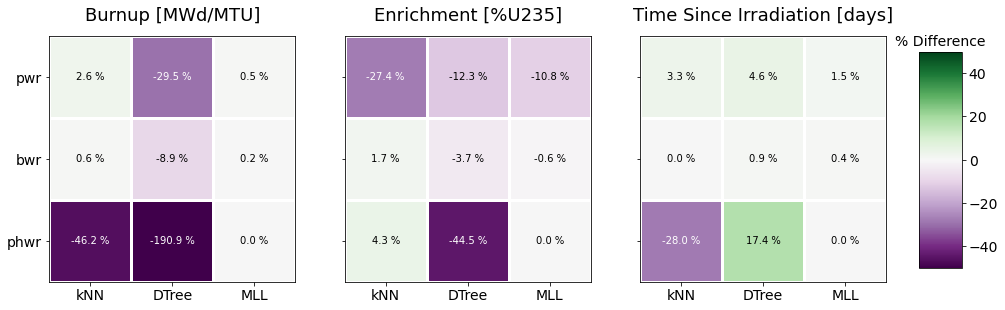

In [158]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))
for a, ax in enumerate(axs):
    im = heatmap(diffs.loc[preds[a]], ['pwr', 'bwr', 'phwr'], algs, ax=ax, cmap='PRGn')
    texts = annotate_heatmap(im, valfmt="{x:.1f} %")
    ax.set_title(Preds[preds[a]], fontsize=18, pad=15)
#fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.93, 0.2, 0.04, 0.6])
fig.colorbar(im, cax=cax)
cax.tick_params(labelsize=14)
cax.set_title('% Difference', fontsize=14) 
plt.show()
fig.savefig('rxtr-type_known-unknown_diff.png', bbox_inches='tight', transparent=True)

### MAE

In [6]:
algs = ['kNN Known', 'kNN Unknown', 'DTree Known', 'DTree Unknown', 'MLL Known', 'MLL Unknown']

metlist = ['MAE', 'MAE Std']
df.loc['burnup', (algs, metlist)]

Algorithm  kNN Known             kNN Unknown             DTree Known  \
Metric           MAE     MAE Std         MAE     MAE Std         MAE   
RxtrType                                                               
pwr        29.920084  153.705883   29.155460  140.401308    9.940661   
bwr        36.728600  193.455279   36.519477  191.664098    8.203592   
phwr       11.173153   38.719796   16.340326   50.706893    0.815625   

Algorithm            DTree Unknown              MLL Known              \
Metric       MAE Std           MAE    MAE Std         MAE     MAE Std   
RxtrType                                                                
pwr        71.865903     12.870026  80.341649   84.295548  309.521055   
bwr        67.466594      8.933005  69.495052  116.932185  350.196901   
phwr       13.076900      2.372649  22.343641   20.914600   57.830051   

Algorithm MLL Unknown              
Metric            MAE     MAE Std  
RxtrType                           
pwr         83.894498  295.711474  
bwr        116.706794  348.068397  
phwr        20.914600   57.830051

In [7]:
df.loc['cooling', (algs, metlist)]

Algorithm   kNN Known             kNN Unknown             DTree Known  \
Metric            MAE     MAE Std         MAE     MAE Std         MAE   
RxtrType                                                                
pwr        132.456927  197.826779  128.049337  196.260938   33.774230   
bwr        175.676383  269.301464  175.593010  267.330754   35.537672   
phwr       243.181412  332.272025  311.197377  444.642356   88.864643   

Algorithm             DTree Unknown              MLL Known             \
Metric        MAE Std           MAE     MAE Std        MAE    MAE Std   
RxtrType                                                                
pwr         48.670103     32.235650   43.044491  35.355698  45.698831   
bwr         51.865140     35.227076   49.774062  40.180991  49.631834   
phwr       121.113654     73.428981  109.427809  43.341564  59.618425   

Algorithm MLL Unknown             
Metric            MAE    MAE Std  
RxtrType                          
pwr         34.832462  44.723707  
bwr         40.013795  49.329946  
phwr        43.341564  59.618425

In [8]:
df.loc['enrichment', (algs, metlist)]

Algorithm     kNN Known                 kNN Unknown                \
Metric              MAE       MAE Std           MAE       MAE Std   
RxtrType                                                            
pwr        1.374173e-03  1.457000e-02  1.750496e-03  1.651764e-02   
bwr        2.422371e-03  2.047550e-02  2.381820e-03  2.031903e-02   
phwr       8.871871e-18  3.010648e-17  8.491884e-18  2.950942e-17   

Algorithm   DTree Known               DTree Unknown               MLL Known  \
Metric              MAE       MAE Std           MAE       MAE Std       MAE   
RxtrType                                                                      
pwr        4.898313e-04  1.100941e-02  5.498512e-04  9.454980e-03  0.005951   
bwr        5.202133e-04  9.791509e-03  5.396236e-04  9.327373e-03  0.012285   
phwr       7.006234e-15  5.151913e-15  1.012167e-14  3.189136e-15  0.000000   

Algorithm           MLL Unknown            
Metric      MAE Std         MAE   MAE Std  
RxtrType                                   
pwr        0.035731    0.006591  0.035804  
bwr        0.053415    0.012362  0.053154  
phwr       0.000000    0.000000  0.000000

In [29]:
svdf = df.loc[:, (algs, 'MAE')].round(decimals=3)
dfi.export(svdf, './plots/rxtr-type_known_unknown.png')

### MAPE

In [9]:
metlist = ['MAPE', 'MAPE Std']
df.loc['burnup', (algs, metlist)]

Algorithm kNN Known           kNN Unknown           DTree Known            \
Metric         MAPE  MAPE Std        MAPE  MAPE Std        MAPE  MAPE Std   
RxtrType                                                                    
pwr        0.082176  0.374071    0.081673  0.359686    0.026736  0.184011   
bwr        0.105152  0.484876    0.104371  0.480858    0.025465  0.193908   
phwr       0.133420  0.486395    0.187409  0.600531    0.009345  0.144750   

Algorithm DTree Unknown           MLL Known           MLL Unknown            
Metric             MAPE  MAPE Std      MAPE  MAPE Std        MAPE  MAPE Std  
RxtrType                                                                     
pwr            0.036136  0.212410  0.243623  0.798753    0.249022  0.790005  
bwr            0.027664  0.188711  0.397864  1.111716    0.398497  1.106976  
phwr           0.027989  0.270266  0.286545  0.950060    0.286545  0.950060

In [11]:
df.loc['cooling', (algs, metlist)]

Algorithm  kNN Known            kNN Unknown            DTree Known             \
Metric          MAPE   MAPE Std        MAPE   MAPE Std        MAPE   MAPE Std   
RxtrType                                                                        
pwr         6.473624  19.225063    6.131223  17.223149    1.499269   3.315384   
bwr         9.182889  33.019719    9.148824  32.475127    1.555974   3.236128   
phwr       13.776581  45.662816   18.622038  70.231922    4.511806  10.912314   

Algorithm DTree Unknown           MLL Known           MLL Unknown            
Metric             MAPE  MAPE Std      MAPE  MAPE Std        MAPE  MAPE Std  
RxtrType                                                                     
pwr            1.425788  2.795564  1.545162  3.129007    1.462619  2.459638  
bwr            1.534431  3.066581  2.065983  4.004970    2.051191  3.965874  
phwr           3.706437  8.478313  2.295526  5.478989    2.295526  5.478989

In [12]:
df.loc['enrichment', (algs, metlist)]

Algorithm     kNN Known                 kNN Unknown                \
Metric             MAPE      MAPE Std          MAPE      MAPE Std   
RxtrType                                                            
pwr        9.688038e-02  7.924717e-01  1.132840e-01  8.485667e-01   
bwr        1.242418e-01  8.569871e-01  1.225774e-01  8.561299e-01   
phwr       1.247802e-15  4.234386e-15  1.194358e-15  4.150411e-15   

Algorithm   DTree Known               DTree Unknown               MLL Known  \
Metric             MAPE      MAPE Std          MAPE      MAPE Std      MAPE   
RxtrType                                                                      
pwr        1.760600e-02  3.468262e-01  1.990853e-02  3.040453e-01  0.260529   
bwr        2.039422e-02  3.332657e-01  2.003066e-02  3.112505e-01  0.455524   
phwr       9.854057e-13  7.246010e-13  1.423582e-12  4.485424e-13  0.000000   

Algorithm           MLL Unknown           
Metric     MAPE Std        MAPE MAPE Std  
RxtrType                                  
pwr        1.315801    0.289329  1.35117  
bwr        1.711855    0.459437  1.70358  
phwr       0.000000    0.000000  0.00000

### MedAE

In [13]:
metlist = ['MedAE', 'IQR_25', 'IQR_75']
df.loc['burnup', (algs, metlist)]

Algorithm kNN Known               kNN Unknown                 DTree Known  \
Metric        MedAE IQR_25 IQR_75       MedAE IQR_25 IQR_75         MedAE   
RxtrType                                                                    
pwr             0.0    0.0    0.0         0.0    0.0    0.0  2.091838e-11   
bwr             0.0    0.0    0.0         0.0    0.0    0.0  3.274181e-11   
phwr            0.0    0.0    0.0         0.0    0.0    0.0  2.728484e-12   

Algorithm                             DTree Unknown                \
Metric           IQR_25        IQR_75         MedAE        IQR_25   
RxtrType                                                            
pwr        3.637979e-12  9.094947e-11  1.455192e-11  4.547474e-13   
bwr        3.637979e-12  1.127773e-10  2.069100e-11  1.818989e-12   
phwr       9.094947e-13  5.456968e-12  1.818989e-12  0.000000e+00   

Algorithm               MLL Known               MLL Unknown                
Metric           IQR_75     MedAE IQR_25 IQR_75       MedAE IQR_25 IQR_75  
RxtrType                                                                   
pwr        5.820766e-11       0.0    0.0    0.0         0.0    0.0    0.0  
bwr        8.731149e-11       0.0    0.0    0.0         0.0    0.0    0.0  
phwr       3.637979e-12       0.0    0.0    0.0         0.0    0.0    0.0

In [14]:
df.loc['cooling', (algs, metlist)]

Algorithm   kNN Known                        kNN Unknown             \
Metric          MedAE     IQR_25      IQR_75       MedAE     IQR_25   
RxtrType                                                              
pwr         71.810502  29.587926  155.341371   68.356727  27.890076   
bwr         89.005141  35.866398  195.969240   89.411294  36.298709   
phwr       125.338030  49.054667  295.312107  158.230351  62.660092   

Algorithm             DTree Known                           DTree Unknown  \
Metric         IQR_75       MedAE        IQR_25      IQR_75         MedAE   
RxtrType                                                                    
pwr        147.636121   16.246067  0.000000e+00   48.440764     17.251769   
bwr        196.226170   19.082693  1.421085e-13   48.393362     19.322679   
phwr       362.505168   47.301337  9.974437e+00  122.514184     36.603001   

Algorithm                           MLL Known                       \
Metric           IQR_25     IQR_75      MedAE    IQR_25     IQR_75   
RxtrType                                                             
pwr        4.547474e-13  46.145581  19.163441  3.855177  51.981369   
bwr        4.547474e-13  48.342412  25.881617  8.573499  50.717955   
phwr       9.858783e+00  84.947914  27.274034  4.466503  55.862568   

Algorithm MLL Unknown                       
Metric          MedAE    IQR_25     IQR_75  
RxtrType                                    
pwr         18.711823  4.318001  49.292552  
bwr         25.881617  8.633613  50.717955  
phwr        27.274034  4.466503  55.862568

In [15]:
df.loc['enrichment', (algs, metlist)]

Algorithm kNN Known               kNN Unknown                 DTree Known  \
Metric        MedAE IQR_25 IQR_75       MedAE IQR_25 IQR_75         MedAE   
RxtrType                                                                    
pwr             0.0    0.0    0.0         0.0    0.0    0.0  1.776357e-15   
bwr             0.0    0.0    0.0         0.0    0.0    0.0  3.552714e-15   
phwr            0.0    0.0    0.0         0.0    0.0    0.0  9.325873e-15   

Algorithm                             DTree Unknown                \
Metric           IQR_25        IQR_75         MedAE        IQR_25   
RxtrType                                                            
pwr        2.220446e-16  7.993606e-15  8.881784e-16  0.000000e+00   
bwr        0.000000e+00  1.154632e-14  2.220446e-15  0.000000e+00   
phwr       2.220446e-16  1.143530e-14  1.132427e-14  1.054712e-14   

Algorithm               MLL Known               MLL Unknown                
Metric           IQR_75     MedAE IQR_25 IQR_75       MedAE IQR_25 IQR_75  
RxtrType                                                                   
pwr        5.329071e-15       0.0    0.0    0.0         0.0    0.0    0.0  
bwr        9.769963e-15       0.0    0.0    0.0         0.0    0.0    0.0  
phwr       1.132427e-14       0.0    0.0    0.0         0.0    0.0    0.0